### **VAE**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
# Flatten images
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


In [ ]:
means = []
variances = []

In [ ]:
def vaeModel(latent_dim):
  original_dim = x_train.shape[1]

  # Encoder
  inputs = keras.Input(shape=(original_dim,))
  z_mean = layers.Dense(latent_dim, name='z_mean')(inputs)
  z_log_var = layers.Dense(latent_dim, name='z_log_var')(inputs)

  def sampling(args):
      z_mean, z_log_var = args
      epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim))
      return z_mean + K.exp(0.5 * z_log_var) * epsilon

  z = layers.Lambda(sampling, name='z')([z_mean, z_log_var])

  encoder = keras.Model(inputs, [z_mean, z_log_var, z], name='encoder')

  # Decoder
  latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
  x = layers.Dense(128, activation='relu')(latent_inputs)
  outputs = layers.Dense(original_dim, activation='sigmoid')(x)

  decoder = keras.Model(latent_inputs, outputs, name='decoder')

  # VAE model
  outputs = decoder(encoder(inputs)[2])
  vae = keras.Model(inputs, outputs, name='vae')


  reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
  reconstruction_loss *= original_dim
  kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
  kl_loss = K.sum(kl_loss, axis=-1)
  kl_loss *= -0.5
  vae_loss = K.mean(reconstruction_loss + kl_loss)
  vae.add_loss(vae_loss)
  vae.compile(optimizer='adam')

  vae.fit(x_train, epochs=20, batch_size=128, validation_data=(x_test, None))

  #reconstructed_imgs = vae.predict(x_test)
  random_latent_vectors = np.random.normal(size=(5, latent_dim))

  # Decode the samples
  generated_samples = decoder.predict(random_latent_vectors)


  #Display images
  n = 5
  plt.figure(figsize=(20, 4))
  for i in range(n):
      ax = plt.subplot(2, n, i + 1 )
      plt.imshow(generated_samples[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  plt.show()

  # Calculate mean and variance of latent space
  z_mean, z_log_var, _ = encoder.predict(x_train)
  latent_mean = np.mean(z_mean, axis=0)
  latent_var = np.mean(np.exp(z_log_var), axis=0)

  print(latent_mean)
  print(latent_var)
  means.append(latent_mean)
  variances.append(latent_var)
  #return np.mean((x_test - generated_samples)**2)

In [ ]:
mse=np.zeros(6)

Epoch 1/20
469/469 [==============================] - 6s 10ms/step - loss: 225.0024 - val_loss: 186.3425
Epoch 2/20
469/469 [==============================] - 8s 18ms/step - loss: 180.1028 - val_loss: 176.2599
Epoch 3/20
469/469 [==============================] - 7s 15ms/step - loss: 175.1038 - val_loss: 174.2188
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 173.5343 - val_loss: 173.3128
Epoch 5/20
469/469 [==============================] - 5s 12ms/step - loss: 172.6564 - val_loss: 172.4929
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 171.9555 - val_loss: 171.7247
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 171.3266 - val_loss: 171.3827
Epoch 8/20
469/469 [==============================] - 6s 12ms/step - loss: 170.8109 - val_loss: 170.9849
Epoch 9/20
469/469 [==============================] - 5s 11ms/step - loss: 170.3455 - val_loss: 170.5651
Epoch 10/20
469/469 [==============================] - 

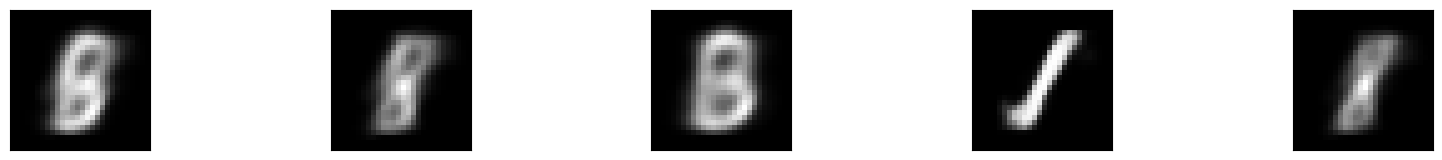

1875/1875 [==============================] - 3s 2ms/step
[-0.15313701 -0.23261908]
[0.01786483 0.02016082]


In [ ]:
vaeModel(2)

Epoch 1/20
469/469 [==============================] - 7s 12ms/step - loss: 206.5211 - val_loss: 165.9992
Epoch 2/20
469/469 [==============================] - 10s 22ms/step - loss: 161.5155 - val_loss: 157.7745
Epoch 3/20
469/469 [==============================] - 9s 19ms/step - loss: 156.4266 - val_loss: 154.5858
Epoch 4/20
469/469 [==============================] - 9s 20ms/step - loss: 153.6615 - val_loss: 152.3883
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 151.9194 - val_loss: 151.0216
Epoch 6/20
469/469 [==============================] - 6s 14ms/step - loss: 150.7971 - val_loss: 150.1662
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 149.9063 - val_loss: 149.3321
Epoch 8/20
469/469 [==============================] - 5s 10ms/step - loss: 149.1893 - val_loss: 148.7401
Epoch 9/20
469/469 [==============================] - 5s 10ms/step - loss: 148.5124 - val_loss: 147.9573
Epoch 10/20
469/469 [==============================] -

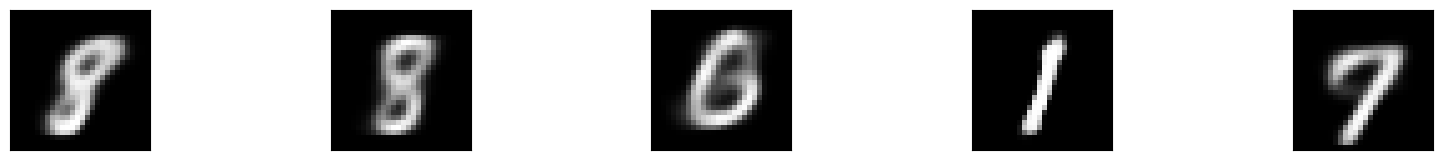

1875/1875 [==============================] - 3s 2ms/step
[-0.30630094 -0.16135703 -0.18069807  0.10301525]
[0.01515423 0.02561371 0.01759134 0.02596779]


In [ ]:
vaeModel(4)

Epoch 1/20
469/469 [==============================] - 6s 11ms/step - loss: 195.9882 - val_loss: 150.3094
Epoch 2/20
469/469 [==============================] - 7s 14ms/step - loss: 145.3763 - val_loss: 140.1729
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 138.6157 - val_loss: 135.6299
Epoch 4/20
469/469 [==============================] - 6s 14ms/step - loss: 135.1592 - val_loss: 133.1346
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 133.0631 - val_loss: 131.1599
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 131.4881 - val_loss: 129.8233
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 130.2761 - val_loss: 128.7885
Epoch 8/20
469/469 [==============================] - 5s 11ms/step - loss: 129.3018 - val_loss: 128.0047
Epoch 9/20
469/469 [==============================] - 6s 13ms/step - loss: 128.5190 - val_loss: 127.3319
Epoch 10/20
469/469 [==============================] - 

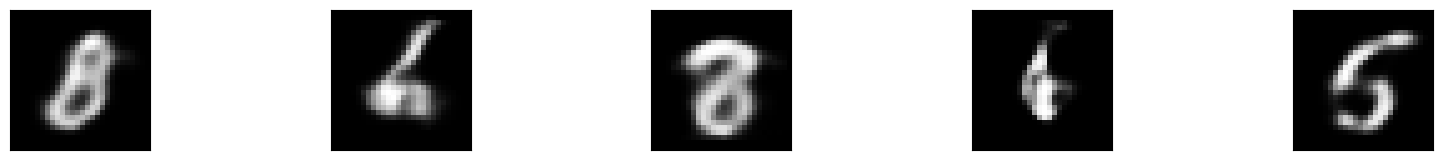

1875/1875 [==============================] - 3s 2ms/step
[-0.05903815  0.01813288 -0.05202366  0.07337853 -0.12449541 -0.25588632
  0.02448148 -0.09600405]
[0.0427223  0.01985142 0.04051613 0.03002462 0.02678681 0.0237396
 0.02900968 0.04839414]


In [ ]:
vaeModel(8)

Epoch 1/20
469/469 [==============================] - 9s 16ms/step - loss: 187.7527 - val_loss: 143.9847
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 137.0636 - val_loss: 130.1759
Epoch 3/20
469/469 [==============================] - 6s 14ms/step - loss: 128.3150 - val_loss: 124.6703
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 124.0349 - val_loss: 121.3931
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 121.4154 - val_loss: 119.1765
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 119.5905 - val_loss: 117.8453
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 118.3096 - val_loss: 116.5489
Epoch 8/20
469/469 [==============================] - 6s 14ms/step - loss: 117.3559 - val_loss: 115.7541
Epoch 9/20
469/469 [==============================] - 5s 11ms/step - loss: 116.6051 - val_loss: 115.1754
Epoch 10/20
469/469 [==============================] - 

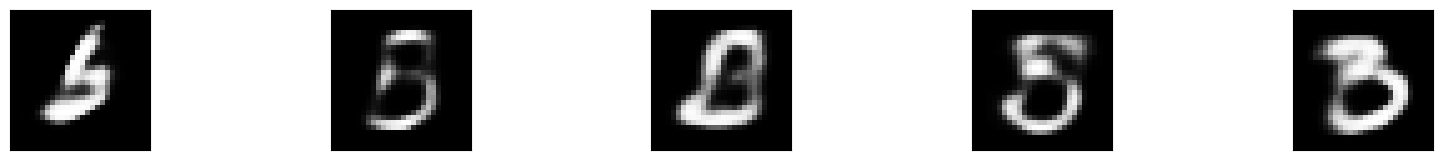

1875/1875 [==============================] - 4s 2ms/step
[ 0.04885548 -0.00041881  0.05945931 -0.06133616 -0.04068352  0.00357787
  0.02117815 -0.0497772  -0.06649807  0.02316537  0.05037568 -0.05317244
  0.04380499  0.02142406  0.02910408 -0.01432952]
[0.10332775 0.0733467  0.05191106 0.03755296 0.10072686 0.05114798
 0.1003392  0.10400619 0.02632463 0.04386552 0.0790661  0.02942904
 0.09206714 0.0230977  0.16346614 0.11908314]


In [ ]:
vaeModel(16)

Epoch 1/20
469/469 [==============================] - 6s 11ms/step - loss: 183.5914 - val_loss: 144.2258
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 137.1122 - val_loss: 129.6313
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 127.1654 - val_loss: 123.1078
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 122.4850 - val_loss: 119.8102
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 119.7553 - val_loss: 117.6814
Epoch 6/20
469/469 [==============================] - 5s 12ms/step - loss: 118.0050 - val_loss: 116.2662
Epoch 7/20
469/469 [==============================] - 6s 13ms/step - loss: 116.7878 - val_loss: 115.3336
Epoch 8/20
469/469 [==============================] - 6s 12ms/step - loss: 115.8294 - val_loss: 114.3910
Epoch 9/20
469/469 [==============================] - 6s 13ms/step - loss: 115.0762 - val_loss: 113.7487
Epoch 10/20
469/469 [==============================] - 

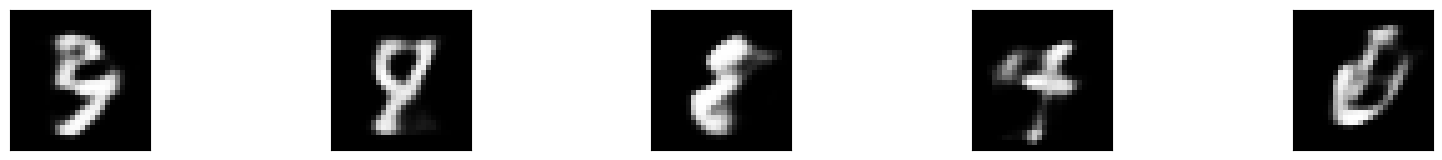

1875/1875 [==============================] - 4s 2ms/step
[ 0.01888099  0.05444906 -0.05516068  0.01762926 -0.03759546  0.01531255
 -0.05001296  0.00772632  0.03264191 -0.00796072 -0.01417369  0.07434828
 -0.06134255  0.01620435 -0.06561587 -0.03086011  0.02856812  0.01871007
  0.07646897  0.0122434  -0.01700099 -0.00240341 -0.02008227 -0.02053077
 -0.0102849   0.08477087  0.04049835 -0.02280356  0.00512107  0.01730081
 -0.02634894 -0.00773921]
[0.29700422 0.12042857 0.05873073 1.0061319  0.257594   0.26590773
 0.08500542 0.24513654 0.20676671 0.04356414 0.4403224  0.03969191
 0.37612107 0.06701081 0.08966013 0.09530243 0.05939541 0.16071998
 0.17798136 0.07952287 0.94181496 0.1442811  0.73892164 0.34113312
 0.51376593 0.31720087 0.10397889 0.37495056 0.04448092 0.7847951
 0.50024515 0.217889  ]


In [ ]:
vaeModel(32)

Epoch 1/20
469/469 [==============================] - 7s 12ms/step - loss: 183.2688 - val_loss: 145.9747
Epoch 2/20
469/469 [==============================] - 8s 18ms/step - loss: 139.3246 - val_loss: 132.2927
Epoch 3/20
469/469 [==============================] - 6s 12ms/step - loss: 129.5021 - val_loss: 125.2229
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 124.0492 - val_loss: 120.9328
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 120.7281 - val_loss: 118.6049
Epoch 6/20
469/469 [==============================] - 7s 14ms/step - loss: 118.7032 - val_loss: 116.9254
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 117.2964 - val_loss: 115.7723
Epoch 8/20
469/469 [==============================] - 7s 15ms/step - loss: 116.2861 - val_loss: 114.8313
Epoch 9/20
469/469 [==============================] - 6s 12ms/step - loss: 115.5356 - val_loss: 114.2680
Epoch 10/20
469/469 [==============================] - 

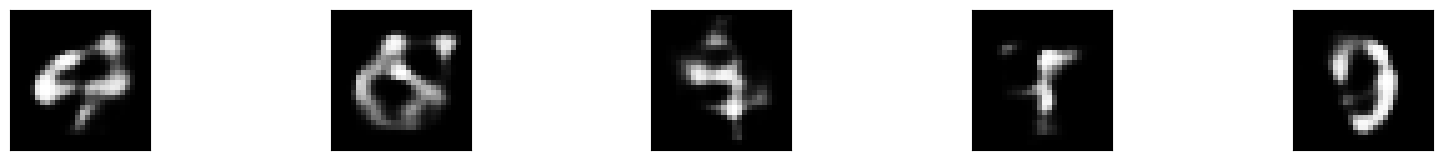

1875/1875 [==============================] - 4s 2ms/step
[ 3.3998556e-02 -1.6883351e-02  1.5708311e-02  9.8003730e-02
 -2.2186723e-02  1.7635064e-02 -1.7841874e-02  5.4038718e-02
 -3.0148562e-02 -2.0078557e-02 -3.1688724e-02 -4.0662214e-02
  7.4468036e-03 -1.4485076e-02  1.6654547e-03 -3.9881417e-03
  6.2429113e-03  1.1079806e-02  2.1476904e-03  7.7413842e-03
 -7.8656450e-03  7.7729309e-03 -1.0247029e-02  1.1418075e-02
 -5.0056968e-03  7.2901472e-02  7.1169161e-03 -4.7782425e-02
 -3.8501921e-03  8.8572055e-03 -4.6103563e-02  2.1896897e-02
 -1.9103047e-02  3.0507408e-02  1.9520445e-02  3.0384682e-02
 -1.4238803e-02 -1.0476614e-02  2.8365459e-02  1.5899701e-02
  1.0778611e-02 -7.8530802e-04 -3.8150094e-02 -4.4711392e-02
 -2.8707987e-02  5.0604227e-03 -4.0506378e-02  3.4732100e-02
  3.3648413e-02 -1.9683260e-02  1.1030264e-02  1.8480023e-02
  3.9529383e-02 -5.6548402e-02 -4.1842166e-02 -1.1739558e-01
  4.3834420e-03  1.7927842e-02 -2.7631402e-02 -2.2964727e-02
  3.6805766e-03  1.8685498e-

In [ ]:
vaeModel(64)

In [ ]:
print(means)
print(variances)

[array([-0.15313701, -0.23261908], dtype=float32), array([-0.30630094, -0.16135703, -0.18069807,  0.10301525], dtype=float32), array([-0.05903815,  0.01813288, -0.05202366,  0.07337853, -0.12449541,
       -0.25588632,  0.02448148, -0.09600405], dtype=float32), array([ 0.04885548, -0.00041881,  0.05945931, -0.06133616, -0.04068352,
        0.00357787,  0.02117815, -0.0497772 , -0.06649807,  0.02316537,
        0.05037568, -0.05317244,  0.04380499,  0.02142406,  0.02910408,
       -0.01432952], dtype=float32), array([ 0.01888099,  0.05444906, -0.05516068,  0.01762926, -0.03759546,
        0.01531255, -0.05001296,  0.00772632,  0.03264191, -0.00796072,
       -0.01417369,  0.07434828, -0.06134255,  0.01620435, -0.06561587,
       -0.03086011,  0.02856812,  0.01871007,  0.07646897,  0.0122434 ,
       -0.01700099, -0.00240341, -0.02008227, -0.02053077, -0.0102849 ,
        0.08477087,  0.04049835, -0.02280356,  0.00512107,  0.01730081,
       -0.02634894, -0.00773921], dtype=float32), arr